In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
full_df = pd.read_csv('D:\\TAHA\\CODES\\PROJECTS\\Zero-Day-Network-Intrusion-Detector\\data\\CICIDS2017_Combined.csv')

full_df["Traffic_Type"] = full_df["Label"].apply(
    lambda x: "BENIGN" if x == "BENIGN" else "ATTACK"
)

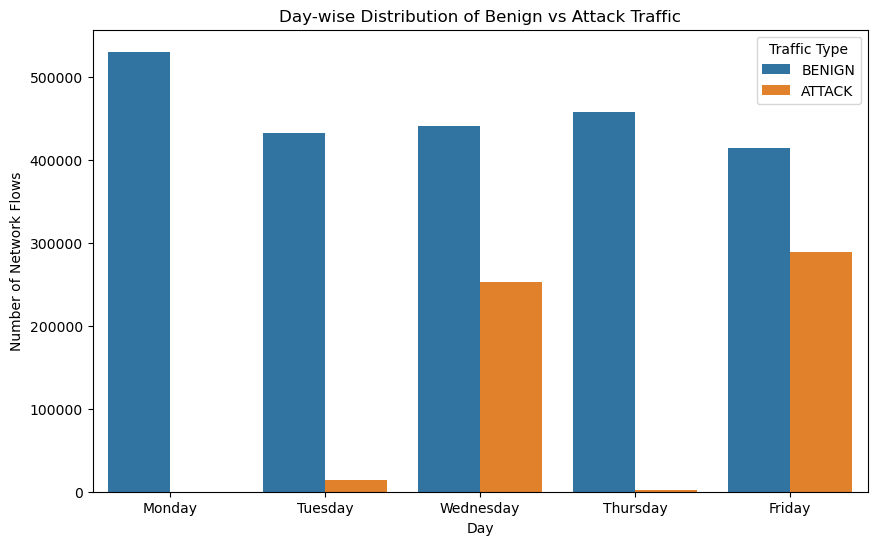

In [5]:
plt.figure(figsize=(10,6))

sns.countplot(
    data=full_df,
    x="Day",
    hue="Traffic_Type",
    order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
)

plt.title("Day-wise Distribution of Benign vs Attack Traffic")
plt.xlabel("Day")
plt.ylabel("Number of Network Flows")
plt.legend(title="Traffic Type")
plt.show()


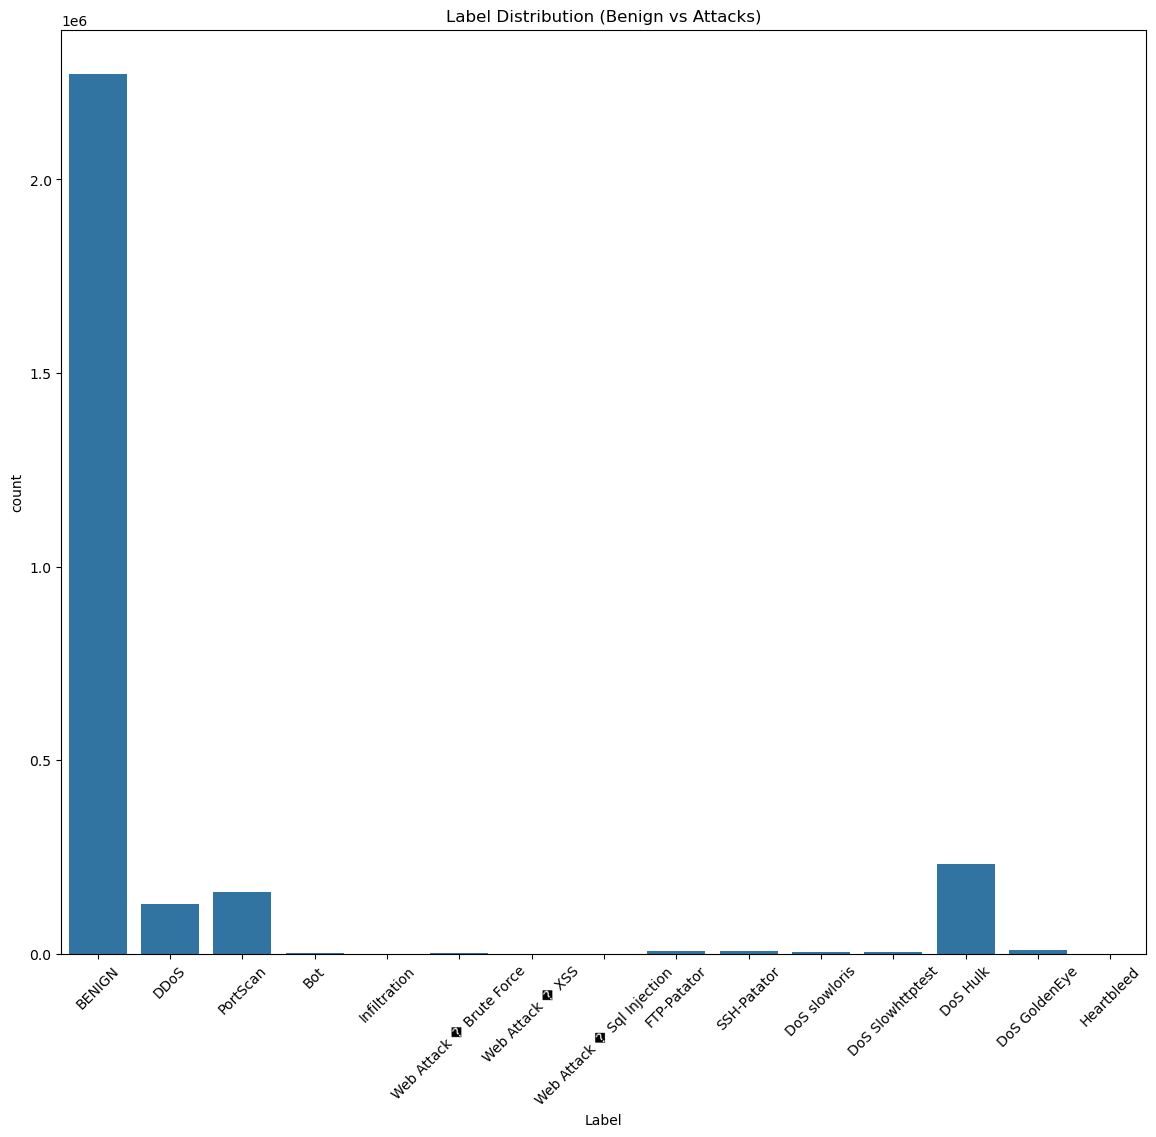

In [6]:
plt.figure(figsize=(14,12))
sns.countplot(data=full_df, x="Label")
plt.xticks(rotation=45)
plt.title("Label Distribution (Benign vs Attacks)")
plt.show()

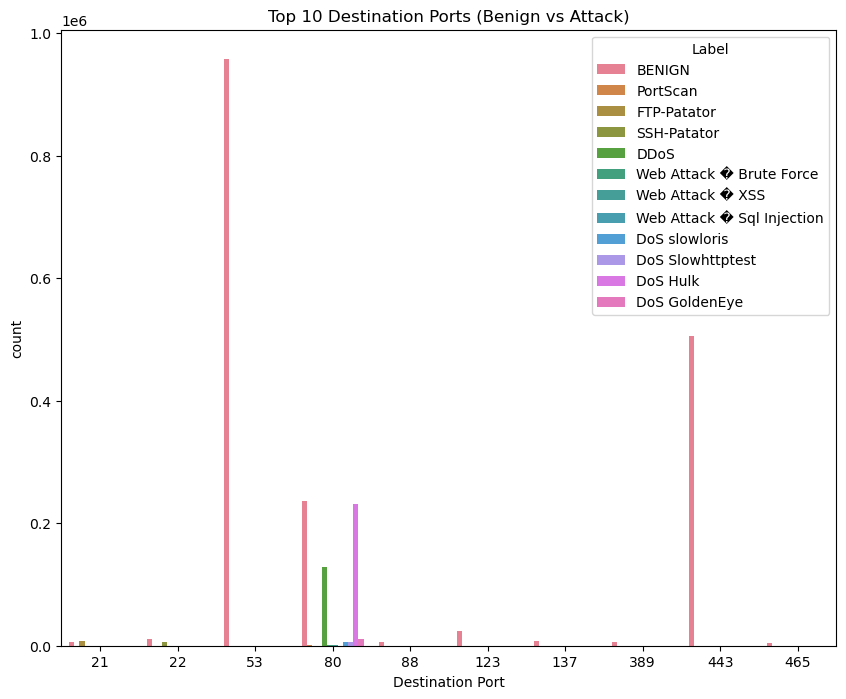

In [7]:
top_ports = full_df["Destination Port"].value_counts().head(10).index

plt.figure(figsize=(10,8))
sns.countplot(
    data=full_df[full_df["Destination Port"].isin(top_ports)],
    x="Destination Port",
    hue="Label"
)
plt.title("Top 10 Destination Ports (Benign vs Attack)")
plt.show()


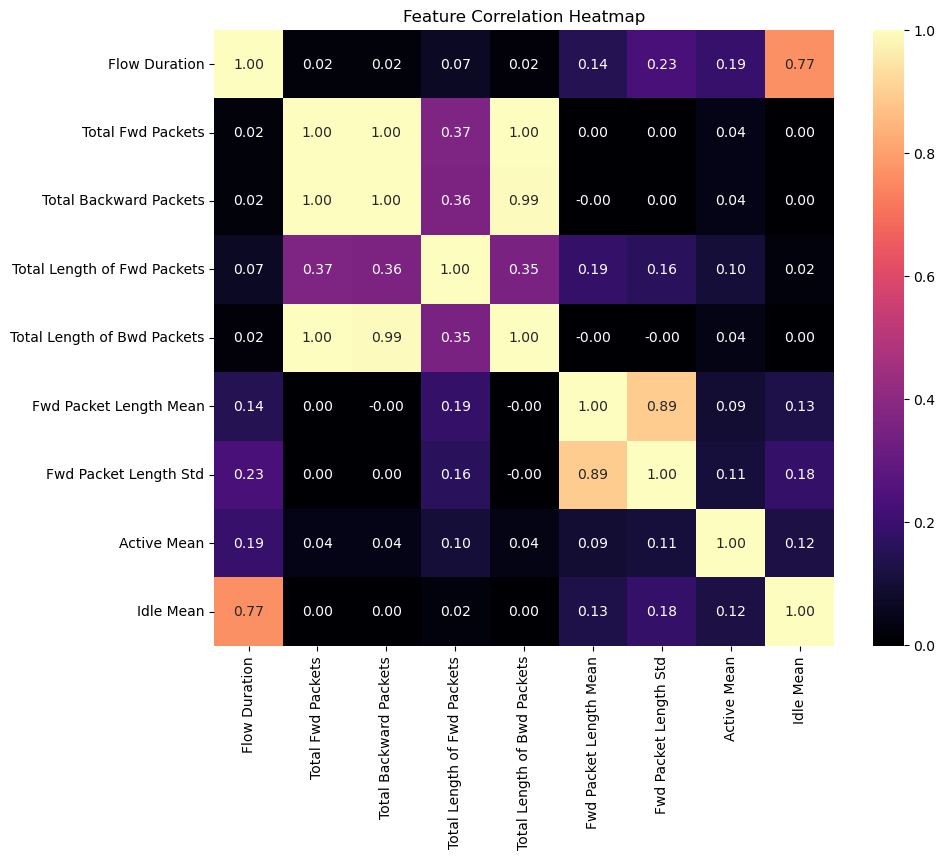

In [8]:
selected_features = [
    "Flow Duration",
    "Total Fwd Packets",
    "Total Backward Packets",
    "Total Length of Fwd Packets",
    "Total Length of Bwd Packets",
    "Fwd Packet Length Mean",
    "Fwd Packet Length Std",
    "Active Mean",
    "Idle Mean"
]

corr = full_df[selected_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="magma", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()